In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Deep Learning Libraries
from keras.models import Sequential
from keras.layers import Dense,Dropout

# Misc. Libraries
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv("heart.csv")

In [394]:
data.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
5     57    1   0       140   192    0        1      148      0      0.4   
6     56    0   1       140   294    0        0      153      0      1.3   
7     44    1   1       120   263    0        1      173      0      0.0   
8     52    1   2       172   199    1        1      162      0      0.5   
9     57    1   2       150   168    0        1      174      0      1.6   
10    54    1   0       140   239    0        1      160      0      1.2   
11    48    0   2       130   275    0        1      139  

제목 : 머신러닝을 통한 심장병 예방

대부분의 심장병은 선천적인 요인이 아닌 후천적인 요인으로 발병하게 됩니다.

건강한 삶을 위해서 심장병을 예방하기 위해서 저희는 머신러닝을 통하여 심장병에 고위험군을 객관적으로 알 수 있었습니다.



In [396]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


저희가 찾은 자료의 컬럼은 

연령, 성별, 가슴통증, 휴식 중 혈압, 콜레스트롤 수치, 공복 혈당, 심전도, 최대 심박수, 운동 유발성 협심증 유무, 올드 피크,운동시 ST(심전도) 이상 유무, 운동시 ST (심전도) 기울기. 주요한 혈관의 수 등이 있었습니다.

위 컬럼들은 충 머신러닝으로 학습할 수 있을 정도로 큰 데이터가 기록되어 있었습니다. 

In [397]:
import seaborn as sns
#-*- coding: utf-8 -*-

먼저 나이와 성별에 따른 관게를 알고 싶었습니다.

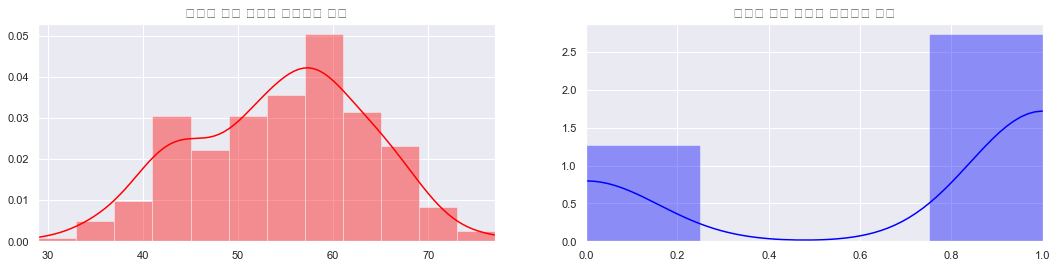

In [398]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
age = data['age'].values
sex = data['sex'].values
sns.distplot(age, ax=ax[0], color='red')
ax[0].set_title('나이에 따른 심장병 유발률의 변화', fontsize=14)
ax[0].set_xlim([min(age), max(age)])
sns.distplot(sex, ax=ax[1], color='blue')
ax[1].set_title('성별에 따른 심장병 유발률의 변화', fontsize=14)
ax[1].set_xlim([min(sex), max(sex)])
plt.show()

In [399]:
ag

NameError: name 'ag' is not defined

In [ ]:
age = data['age'].values

In [400]:
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager,rc

In [401]:
font_path = "C:\Windows\Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()

In [402]:
matplotlib.rc('font',family=font_name)

In [403]:
import mglearn
from sklearn.neighbors import KNeighborsClassifier

In [404]:
X, y = mglearn.datasets.make_forge()

In [405]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [406]:
# 각각의 컬럼의 분포를 찾아보자 연령, 성별, 가슴통증, 휴식 중 혈압, 콜레스트롤 수치, 공복 혈당, 심전도, 최대 심박수, 운동 유발성 협심증 유무, 올드 피크,운동시 ST(심전도) 이상 유무, 운동시 ST (심전도) 기울기. 주요한 혈관의 수 등이 있었습니다.

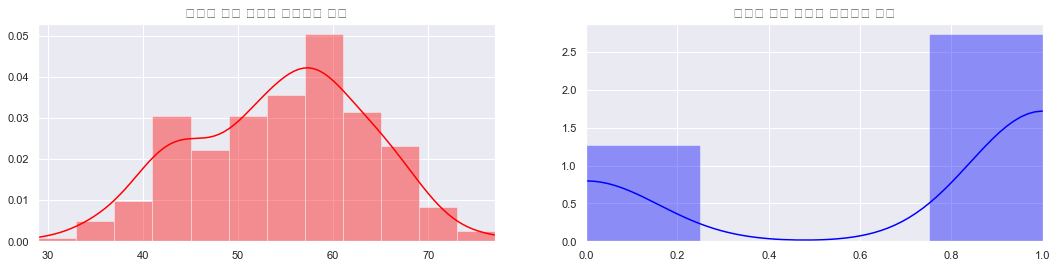

In [437]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
age = data['age'].values
sex = data['sex'].values
sns.distplot(age, ax=ax[0], color='red')
ax[0].set_title('나이에 따른 심장병 유별률의 변화', fontsize=14)
ax[0].set_xlim([min(age), max(age)])
sns.distplot(sex, ax=ax[1], color='blue')
ax[1].set_title('성별에 따른 심장병 유별률의 변화', fontsize=14)
ax[1].set_xlim([min(sex), max(sex)])
plt.show()

KeyError: "None of [Index(['target'], dtype='object')] are in the [columns]"

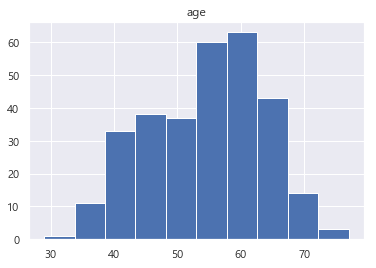

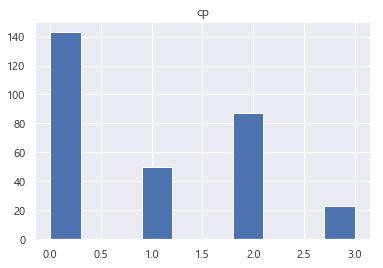

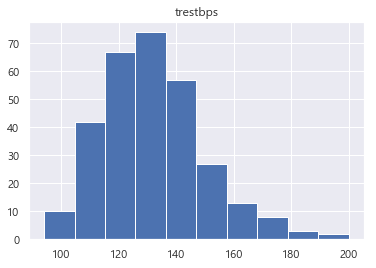

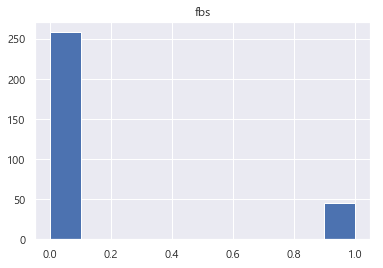

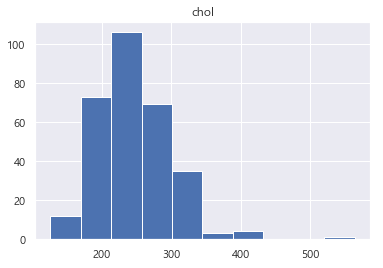

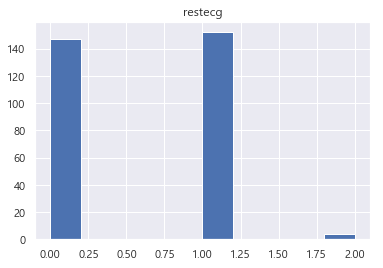

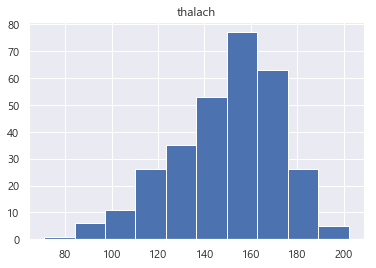

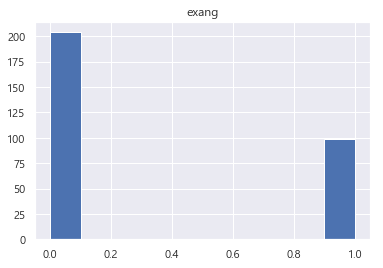

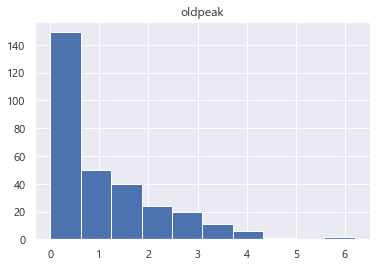

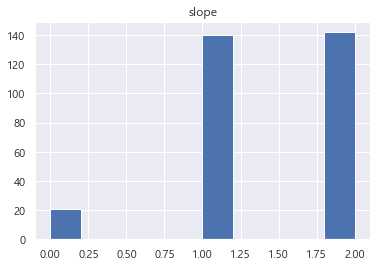

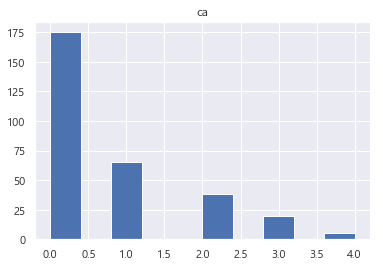

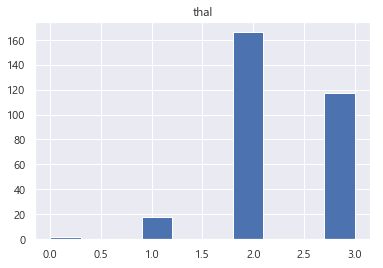

In [407]:
data.hist('age')#연령
data.hist('cp')#가슴통증
data.hist('trestbps')#혈압
data.hist('fbs')#공복 혈당
data.hist('chol')#콜레스트롤 수치
data.hist('restecg')#휴식시 심전극
data.hist('thalach')#최대 심박수
data.hist('exang')#운동 유발성 협심증
data.hist('oldpeak')#운동시 ST(심전도) 급락폭
data.hist('slope')#운동시 ST(심전도) 기울기
data.hist('ca')#혈관상태
data.hist('thal')#CT심장촬영등급 정상:3 가장 위험한 상태 : 7
data.hist('target')#심장병 유무

In [ ]:
matrix = data.corr()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
matrix

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
targets = data.pop('target').values

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
df.head()

In [ ]:
df.target.value_counts()

In [ ]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [ ]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

In [ ]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("심장병을 보유한 사람 : {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("심장병이 없는 사람: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))


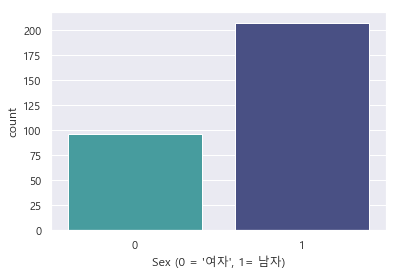

In [408]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = '여자', 1= 남자)")
plt.show()

In [409]:
#통계에는 여자보다 남자가 더 많다

In [410]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("여자 : {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("남자 : {:.2f}%".format((countMale / (len(df.sex))*100)))

여자 : 31.68%
남자 : 68.32%


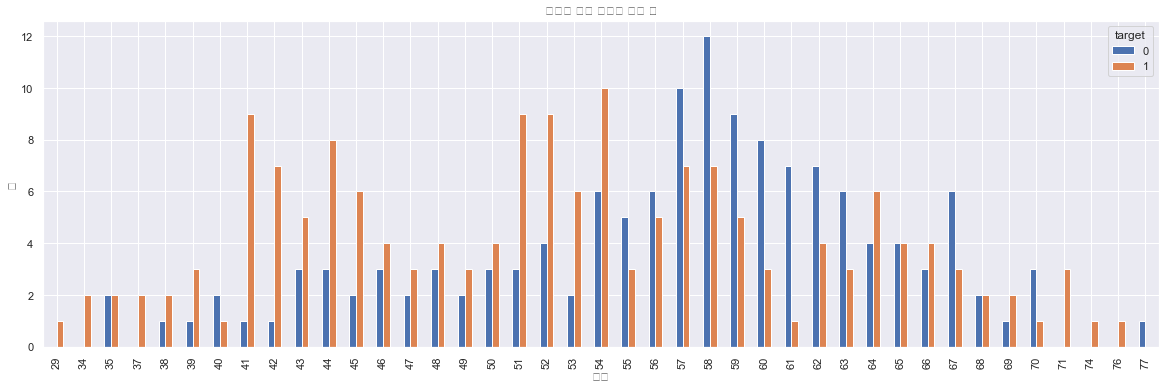

In [438]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('연령별 나눈 심장병 환자 수')
plt.xlabel('연령')
plt.ylabel('명')
plt.savefig('heartDiseaseAndAges.png')
plt.show()
# 0 여자
# 1 남자

In [412]:
# 나이와 성별을 기준으로 나타낸 표

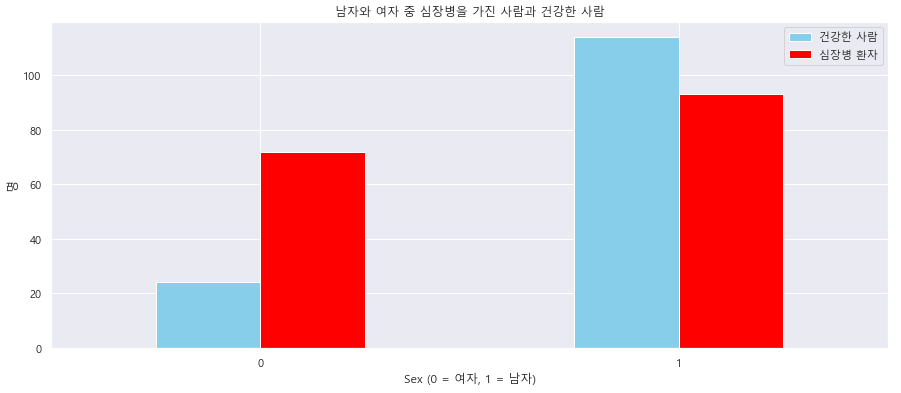

In [413]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['skyblue','red' ])
plt.title('남자와 여자 중 심장병을 가진 사람과 건강한 사람')
plt.xlabel('Sex (0 = 여자, 1 = 남자)')
plt.xticks(rotation=0)
plt.legend(["건강한 사람", "심장병 환자"])
plt.ylabel('명')
plt.show()

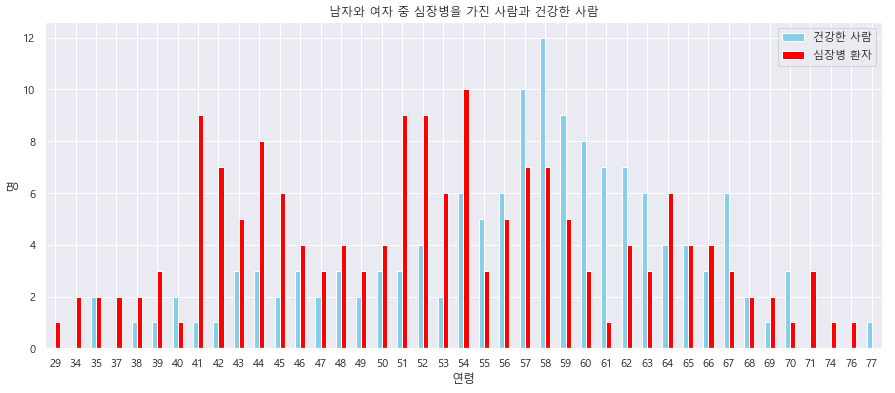

In [414]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(15,6),color=['skyblue','red' ])
plt.title('남자와 여자 중 심장병을 가진 사람과 건강한 사람')
plt.xlabel('연령')
plt.xticks(rotation=0)
plt.legend(["건강한 사람", "심장병 환자"])
plt.ylabel('명')
plt.show()

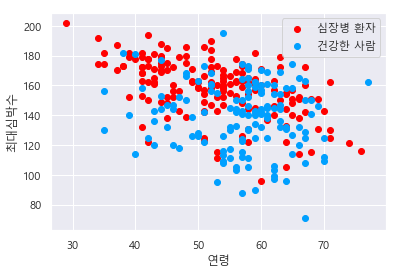

In [415]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c="#00a0ff")
plt.legend(["심장병 환자", "건강한 사람"])
plt.xlabel("연령")
plt.ylabel("최대심박수")
plt.show()

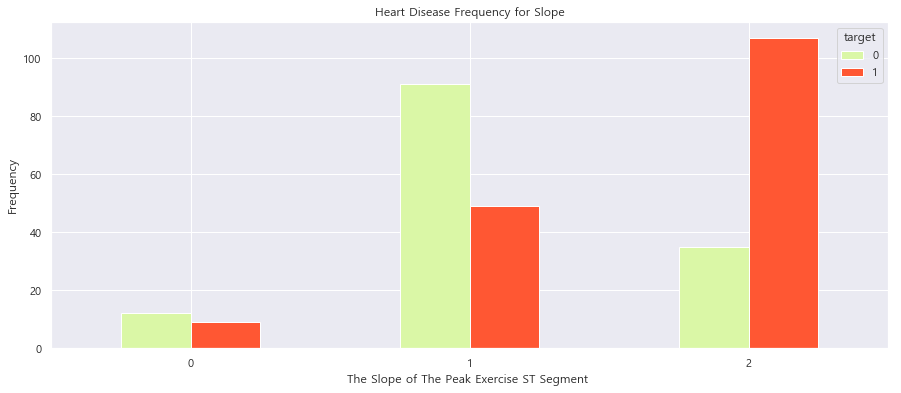

In [416]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

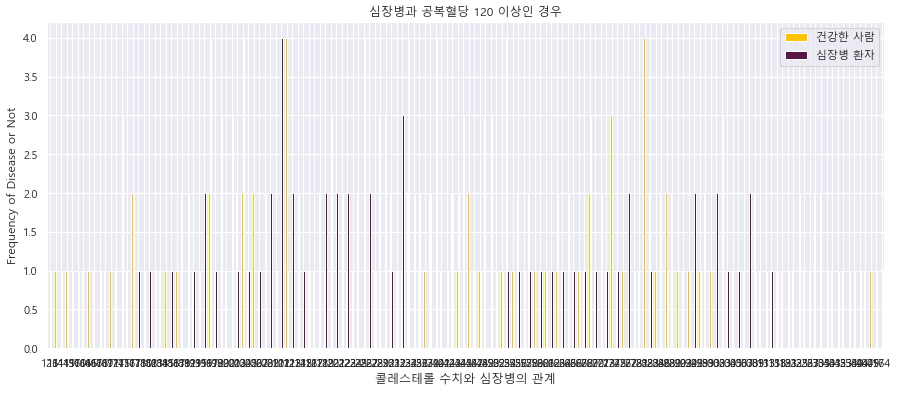

In [417]:
pd.crosstab(df.chol,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('심장병과 공복혈당 120 이상인 경우')
plt.xlabel('콜레스테롤 수치와 심장병의 관계')
plt.xticks(rotation = 0)
plt.legend(["건강한 사람", "심장병 환자"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

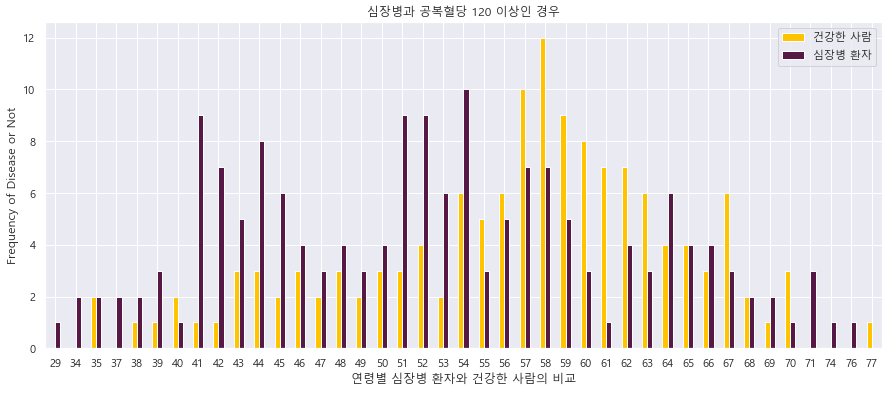

In [418]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('심장병과 공복혈당 120 이상인 경우')
plt.xlabel('연령별 심장병 환자와 건강한 사람의 비교')
plt.xticks(rotation = 0)
plt.legend(["건강한 사람", "심장병 환자"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

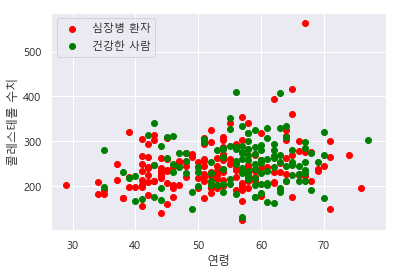

In [419]:
plt.scatter(x=df.age[df.target==1], y=df.chol[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.chol[(df.target==0)], c="green")
plt.legend(["심장병 환자", "건강한 사람"])
plt.xlabel("연령")
plt.ylabel("콜레스테롤 수치")
plt.show()

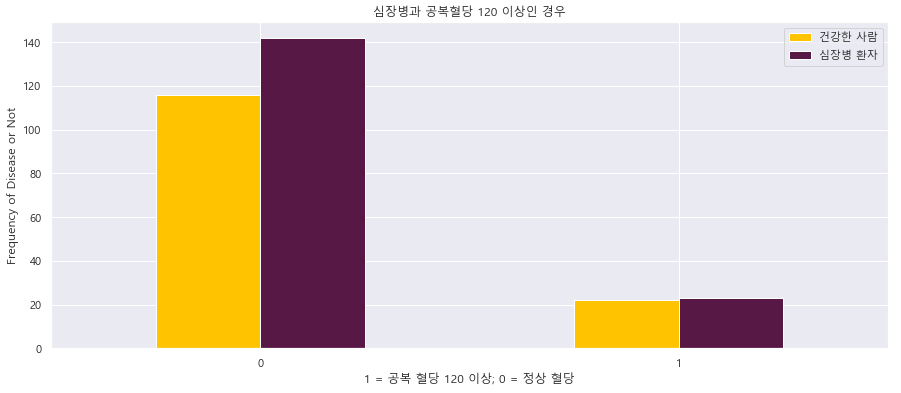

In [420]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('심장병과 공복혈당 120 이상인 경우')
plt.xlabel('1 = 공복 혈당 120 이상; 0 = 정상 혈당')
plt.xticks(rotation = 0)
plt.legend(["건강한 사람", "심장병 환자"])
plt.ylabel('Frequency of Disease or Not')
plt.show()
#저혈당 상태의 사람들에서 심장병 환자의 비율이 높았다.

In [421]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYYAAAEJCAYAAACQZoDoAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJztnXl8VOXV+L9nAiQs2hBISiUCCiqCUhfUorFiE5G6/qQuSLQWq7gvba2Ktq+2VvEVawV3LIIUEFTQovgqi0WJxYpr64bSFjEgTQzEokCAmef3x0xCJrnPJXdyZ+4s5/v55JPcZ555tjuZc59znnOOGGNQFEVRlEZCQQ9AURRFSS9UMCiKoihxqGBQFEVR4lDBoCiKosShgkFRFEWJQwWDoiiKEocKBkVRFCUOFQyKoihKHCoYFEVRlDg6BD2AROjZs6fp169f0MNQFEXJGN56660vjTHFbambkYKhX79+vPnmm0EPQ1EUJWMQkc/aWldVSYqiKEocKhgURVGUOFQwKIqiKHFkpI1BUZTMZceOHVRXV7Nt27agh5KVFBQUUFpaSseOHRNuQwWDoigppbq6mj322IN+/fohIkEPJ6swxlBXV0d1dTX77LNPwu2oKklRlJSybds2evTooUIhCYgIPXr0aPduTAWDoigpJ12Fwtq1a6murt5tveeee65N7dXU1PDhhx+61tm+fTtr166Nu/7000932/a6descj+37sbZJEwwiUigic0RkmYi8KiL7iMgBIrJURF4TkYnN6t4mIq/Eygcna0yKoijNGTlyZNz1yy+/zLJly5quhw8fzvDhw+nRowfDhw+nsrISgAceeCDufdOnT2fOnDmt2v3www+ZP3++Y9///Oc/WbZsGfPnz+fKK69k2bJlLFu2jJqaGm6//famerNmzaKiooJBgwYxZMgQKioqWLRoEZ9++ikvvvhiu+ZvI5k2hi7Az40x60XkZOA6YF/gp8aYNSLylIgcBXQCvm2MOU5EDgImAiclcVyKkp7UzILPboaGtZDfB/reDiWVQY8qawmHw7zzzjuEw2Hy8vIc6yxbtoytW7dy4IEHxgkMJ6qqqti5cycAn3/+OcOHD6e+vp4zzzzTsf7mzZuprq7mjTfeoGfPnrz33nt8+9vfZsCAAXH1Kisrqays5NFHH6WwsJCzzjqraWzJImk7BmPMemPM+tjlJqABKDDGrImVzQOGASOAJ2LveR8oStaYFCVtqZkFq8dBw2eAif5ePS5anuNUzV/KVUecx7l7nchVR5xH1fylvrQ7ZcoUDj/8cO666y7XepMnT6a8vJxHH300rnz48OE888wzTdddu3alsLCQwsJCunTpwrJly7j33nut7R588ME88cQTDBs2jHPOOYcPPviAb33rW9b669evb5Oayw+SbmMQkd5Edwu/B+qavVQHdAdKgNpm5TtFRG0fSm7x2c0Q2RJfFtkSLc9hquYv5dHr7uXL6howhi+ra3j0unvbLRxmzpzJe++9x8KFCwG4/vrraWhoiKsTiUSYNGkS4XCYqVOnsn79em655RbC4TAQfWI/44wzmup/97vfZeTIkYwcOZI99tiDiooKfvGLX1jHsGPHDjZv3kzfvn3p168fxcXFTbaGFStWcOmllzbtQABee+01Fi9eHNfGnDlzOPPMM9m4cWO71qMlST2uKiKnAKcCFwNbgMJmL3cnKhA6x/5uJGKMiTi0NQ4YB9CnT59kDVlRgqFhrbfyHGHuhGls3xr/hb19awNzJ0yjbFR5Qm1+8803hMNhHnroIUSE8ePH89FHH5Gfn0+/fv2a1Er19fXstddeTaqbW265hffff5+8vDxaBvE87LDDWLBgAXfeeScAI0aM4MYbb2TZsmVUVVU5jqOgoIA5c+YwdepUXnrpJW699VYqKiqorq5m2LBhPPzww011X3zxRQ499FAgavg+9dRTARg9ejS/+tWvEloHN5ImGERkCHCqMeaSZmX5ItLbGLMOGAX8BhgAnAksF5FBgONeyRgzBZgCMHToUJOscStKIOT3iamRHMpzmC/X1TqW11nK20LXrl254IILmDZtGtOnT49zBGtoaGD8+PEAFBUVcdZZZ/HZZ5/xq1/9ipqaGowxdO7cmRtuuCGuzSFDhjBkyBBmzJjBk08+yfbt23nllVf4wQ9+wC9/+UvHcdxwww2sXbuW7du3EwqFePzxx5k2bRrnn39+XL1PP/2Uu+++m2effZa8vDxOP/10SkpKEp5/W0jmjmEkcKyILItdrwV+DjwtIg3AAmPMRyKyCjhJRJYDm4FLHFtTlGym7+1Rm0JzdVKoS7Q8h+nZuziqRmpBj95tih7tyn/+8x9+85vfMHz48KaymTNntlLLXHjhhdx7770cfPDBANTW1nLqqafy8ssv06VLl6Z6zzzzDK+++ipz586la9eu7Nixg3vuuYeJEyc6PtX/7//+L6tWraK+vp6jjjqqqbylHWHJkiVMnTqVbt26AfDEE0/w7rvvWg3mfpBM4/NdxphBxpjhsZ8fG2NWGmOGxa7vidWLGGMuM8Yca4w5yRjzebLGpChpS0klDJgC+X0Bif4eMCXnTyWdM34snTrnx5V16pzPOePHpmwMDQ0N7LHHHk3XjcKguf4fYNOmTfTp04euXbsC0LFjRwYMGMCmTZusbX/66aesXLkyrqy0tJTp06c3XV922WX07du36bpHjx6UlyemRmsrGhJDUdKFksqcFwQtabQjzJ0wjbp1tfToXcw548cmbF9oyS9+8Qu6d99l4tywYQM33nhjXJ2HH36YK664gq1btyIiGGO45ZZb2HPPPePqXXDBBfz617/m+OOPp0OHDkQiEfr168cf/vAH1zHcf//9PPvss3Flffr04bHHHmvn7BJHjMk8df3QoUONJupRlMzko48+4sADDwx6GFmN0xqLyFvGmKFteb8eC1UURVHiUMGgKIqixKGCQVEURYlDBYOiKIoShwoGRVGUGM888wxPPfXUbus98sgjjuU//OEP464rKio8j8EWTrslX3zxBe+++67n9tuCCgZFSRY1s2BlP6gKRX9rQLy04f7776eiooKKigqGDBnSFOzum2++4ZtvvmmqN378+KZ6BxxwAH/84x8B4oLnrVy5kosuuoiLLrqId999t+nvVatWtWks06dPZ+bMmU3XLcNpv//++01jqKiooLg46ty3atUqnn/++cQXwQX1Y1CUZNAYLbXRk7kxWiqor0IacOWVV3LllVcCUV+G448/3rHehAkTmv4ePXo0J554Yqs6Bx98ML/73e9YtWoVRx55JAcddBD77rsvRUVtCxQdDoddk+v079+f+++/v+n6wgsvbFO77UF3DIqSDDRaqn8kcee1du1aNmzYQH5+Ps8//7xVNTN//nz69OnD3nvv3VRWVlbG/PnzKSgo4Omnn2bWrFl07tyZ+++/n5dffplOnTq1aQyff/45n33mECcrxltvvcVFF13E9OnTmT59epwQmzp1KqNGjWrjbNuO7hgUJRlotFR/SOLOq7a2lssuu4zJkyfz5ZdfUl1d3SpOUmPo7c8//5yJEyfGvdY8aurzzz/fpP4ZM2YMp512GmPGjCESiVBRUcG1117LKaec4jiOFStWNIXybuTJJ5/k/fff58EHHwSi0VsvuugiIpEIW7du5e233wbgpz/9aWZFV1WUnEajpfqD284rQcFgjOGZZ55h8uTJPPDAA/Tv35/+/ftz1FFH0a1bt6YYSPX19VRWVjJ27Fh+9rOfxbXRv3//uOtBgwbx8MMPM3z4cJ599lmOOeYYAEKhEEuWLLGO5emnn+b444+nc+fOTJkyhXHjokLv7LPPbvrCHzBgAIMGDWLJkiWEQiEKCgrYd9992WOPPdhrr70SWoPdoYJBUZKBRkv1hyTsvLZv387q1at55plnmgLeOVFYWMjChQt59913OeWUU9i+fTsQ3UW0TMAzceJE5s6dy+zZsznkkEPiEvjYeP3115kxYwbz5s2jQ4cOVFZW0qVLF0pLS+Pq9erVi2HDhjkm/Rk7NjnBBFUwKEoyaHya1RzO7SMJO6/8/Hyuv/565syZw7Zt2/jJT37S9Np5553Xqv6ll17KvHnz6N27NwBff/01I0aM4KijjmoyMOfl5bFq1Sp++9vfxr130aJF1nH84x//YMaMGU35IB5//HH++te/4hS/btOmTVRUVMQF+Kuqqkpa3mc1PitKsiiphCPWQFkk+luFgnf63h7daTUnxTsvEYk7NdT4d8uTRH/7299avTcUsn/FXnzxxRQW7kpq2bFjR4477rj2DtcXdMegKEr6kuSd15133hmX+wDghBNO4Oabd50ee+ihh7j44ovZsWMHED1eevPNN8eF6wbYtm2bo0PbxIkTm9JytoepU6fG2Su++uorTj/99Ha364SG3VYUJaVo2O3ko2G3FUVRFF9RwaAoiqLEoYJBUZSUk4kq7EzBj7VVwaAoSkopKCigrq5OhUMSMMZQV1dHQUFBu9rRU0mKoqSU0tJSqqurqa2tDXooWUlBQUErJzmvqGBQFCWldOzYkX322SfoYSguqCpJURRFiUMFg6IoihKHCgZFURQlDhUMiqIoShwqGBRFUZQ4VDAoiqIocSRNMIhIsYjcLiK3xa5LReRFEVkuIpOb1btNRF4RkddEZHCyxqMoiqK0jWTuGH4PNAAdY9c/B+42xhwLFInI4SJyLPBtY8xxwCXAROemFCWLSGJy+3Shav5SrjriPM7d60SuOuI8quYv9b+THFjHoEiag5sx5sciMhwYGSvaTFQghIA9gE3A/wOeiNV/X0SKkjUeRUkLkpjcPl2omr+UR6+7l+1bGwD4srqGR6+7F4CyUeX+dJID6xgkqbQxPALcDXwEfGWM+RdQAjT3i98ZExyKkp24JbfPEuZOmNYkFBrZvrWBuROm+ddJDqxjkKTyS/gx4BhjzAHAShG5HPgKaJ4GKWKMiTi9WUTGicibIvKmxlhRMpYkJLd3IiWqHAtfrnP+/6yzlAPe1UIpWsdcJZWC4TvAxtjfXwD9gOXAmQAiMgiotr3ZGDPFGDPUGDO0uLg4yUNVlCRhS2LfjuT2LWlU5XxZXQPGNKlyUiUcevZ2/v/sYSlvUgs1fAaYXWohN+GQgnXMZVIpGH4FLBKRZcCFRNVKC4FOIrI8dn1DCsejKKknBcntU6LKceGc8WPp1Dk/rqxT53zOGT/W+Q2JqIVSsI65TFKjqxpjlgHLYn8/BzznUO2yZI5BUdKKJCe3hwRVOT7SaGCeO2Eadetq6dG7mHPGj7UbnhNRC6VgHXMZDbutKKmmpDKpX2A9exdH1UgtsKpykkDZqPK2n0DK7xNTIzmUu5Hkdcxl9ASQomQZnlU5QaNqobRDdwyKkmV4VuUEjaqF0g7JxLyrQ4cONW+++WbQw1AURckYROQtY8zQttRVVZKiZCMaLkJpB6pKUpRsQ8NFKO1EdwyKkm1ouAilnahgUJQ2EGSICc9ouAilnagqSVF2Q0qihfpJon4BihJDdwyKshuCDjHhGfULUNqJCgZF2Q1Bh5jwTEklDJgC+X0Bif4eMEUNz0qbUcGgKLvBc7TQVGI7lvrf16Chmmi00urodQrJKJuM0goVDIqyG9I2xIQtXPXfK2DDQ0A4VjEcvV59eUqGFXTYb6X9qGBQlN1QNqqci+++lp6lJYgIPUtLuPjua4M3PNuOpf7X8gW8YUryx0QG2mSUVuipJEVpA56ihaYKz8dPw7uv4gMZZ5NRWqE7BkXJVDwfP81LyjBaktY2GaVNqGBQlEzFdix1T8vOpte45I+JNLbJKG1GBYOiZCq2Y6lDlkCvy9i1Q8iLXg94MCXDSlubjNJmNOy2oihKDqBhtxVFUZSEUcGgKJmA5ldQUogeV1WUdEfzKygpRncMipLuJJJfQXcYSjvQHYOipDte8yvoDkNpJ46CQUSOAH64uzcbY37r+4gURYnHa34Ftx2GCgalDdh2DJ8DGvFKUdKBvrfH7wDAPb+CZnBT2omjYDDGbBCRb4CjjDFLGstFZD9ggDHm/1I1QEXJeRqf8j+7Ofrlnt8nKhRsT/+awU1pJ27G5z2BEY0XIlIITAI+SvagFEVpQUklHLEGyiLR324qIc3gprQTm41hT6A/0ENEDgKOBEYDvzDGrEnd8BRF8YzXHYaitMC2YzgYOB8YAlwOXAJ8CHza1oZFpFhEbheR22LXIRG5V0RWiMhrItIjVn6biLwSKxvcrtkoShphzWKWaUdJfRyvbU0+XngTGxd0JfKqsHFBVz5eeFPC/Sey7ppxLh5rrCQR6Q1ca4z5Zex6JPBLYLQxZreB1UVkBrAa6GKMuVFELgMajDGPNatzLHC+MWZcbGdylzHmpN21rbGSlHSnMYtZ84Q1nTrnM/6+gxnYfVJrQ7KfOZlbHldtTx8+tmVbk7HXdmfY4Nnk5+/KF9HQkMe/t13PwCMGe+o/kXWvqurl+J5sC/znV6yknUB944Ux5kWiguHWtjRsjPkx8GqzopOAA0TkVRGZKCJC1IbxRKz++0BRW9pWlHTHlsWsJDzJu7OaVxJxiEtBW7Y1Gbz3U3FCASA/PxxdK4/9J7LumnGuNVbBYIz5jzHm9hZlbwNXJdjXkcDTxpjvA52BUUAJ0Hz3sVNEHMckIuNE5E0RebO2VjNBKemNLYtZYeEWx3Jfj5L6eVzVx7Zsa9KjxzbH8sLCLZ77T2TdNeNca9ocEkNEKgCMMZEE+9pgjFkZ+3shMAj4CujerE7E1r4xZooxZqgxZmhxsWaCUtIbWxaz+voujuW+HiW1tZVIHz62ZVuTuroCx/L6+i6e+09k3TXjXGt2KxhEZGzMf+H6dva1VkQOjv09HPg7sBw4M9bPIKC6nX0oSlpgy2JWk3dN8o+S+nlc1ce2bGvywedn0dAQn3a0oSEvulYe+09k3TXjXGvaEivpGGAOIO3s6zpgStS0wHvAglibJ4nIcmAz0dNPipLxNBot506YRt26Wnr0Luac8WMZeHI51AxO7lFSP4+r+tiWbU3KRpXz8cJSSr6ZRGHhFurru1CTdw0DT75j15vb2H8i6142Cuu4chXXDG4i0h+4zBhznYgsNsackLqh2dFTSYqiKN7wcirJumOIHS89kag/Q2PZj5tV2WCMWZTwKBVFUVJI1fylzJ0wjS/X1dJTdwWuuKmSdsZ+R1qUNaqU4s+XKYqipCkt/Ru+rK7h0evuBVDh4IDbcdVHgV8ANzUrm22MmRX7yW3XQEVRPBOUh7H6KnjD9VSSMeafQHcRyQfsxghFUZJLpoXRcKDxqf3L6howpumpPRXCQX0VvNEWP4ZXgd60/1SSoiiJ0BiWouEzwOzKyJZhwiHIp3b1VfDGbgWDMWaOMeZfwIQUjEdRlJb4GeIiQIJ8aldfBW+02fPZGPNyMgeiKIqFLMnIFuRTe9moci6++1p6lpYgIvQsLcm6IHl+0hYHNyVbqZmlMfvbSKBHHbMkI9s548c6RjHd3VP7xwtvoiTs4vzWRspGlasgaCNt3jEoWUaW6K1TQZBGUwC6WyLR28rTlESe2j9eeBP7FNxFUdEWQiEoKtrCPgV3xedrUHzH1fM5XVHPZx9Y2c/yFNo3mjpSaeKqI86LCoUW9Cwt4b6VM5M/gBy+VxsXdKWoqHVk1I0bu1B02jcBjChz8SsfAyLSRUSu9WdYSlqRJXrrVBD4Ucccvle2cNnWMNqKL9hyH1wsIv8D3AycGvsbERkvIv/T+JPKgSo+42doZnx2XErFmX0PfSRqNPVtTVzulS0lplvfnt9jW6tE7pPlPba+beGyrWG0FV9wVCXFci93a15mjPmbiBwB3AdcA0wyxnwvJaNsgaqSfCAFKRsTOvXhZ1pKn/pIZH5+rsmHfyrjwH6vIc08iYyBf63tQ2mvda1SYq74YAzT7t3k2HfP/KXsU3BXm99jTYlZcgHUPO7tPlnW/eNN1zDhqn94Gu+/t12fkAE6l2m3KskY84Ex5m/ARuCz2N/EEu38N3a92a8BKwFQUhn9J87vC0j0d4Jfvr46LqXizL7HPhIxmvq5JsXd3ooTCgAi0K90rWNKzMF7P2XtuyQ8ydN7rCkxN0zxfp8s614SnmQd78CT7+Df265n48YuRCJR24IKheTjFl31Z8DRwBYRmaGxkbKQkkpfnsJ91cGnQp+eQB9ejzr6uSa21Jchi4XQVr9uXa1VN++aXtMRSwxNt/tkec3WR+NaRYVAVBAUoYnhU4GbH8PpxpjhACJyJ9BSMGTecSal3Tid5+/Zu9jx1E5CjkupOLOfgj78XJO6ugKKi1t/cUcikJfnXN+JHr2Lqa/v4njKp66ugKPLvmD0mNX06LGNuroC5sweYK0PeTgKB7c1tKy7zV6g4SqCw+1U0s5mf2+HqPEZ6B8zPO+bzIEp6YftPP+h5Uf6F27Az7SUAfbhZwiGDz4/i4Zt8f+qDdtCvP3+IY4pMT/4/Cxr3zV51zi+p/brwxl36UcUF28jFILi4m2Mu/QjthZUOK9Vr3He19Cy7jV512i4ijTDTTBUi8hlIjIO+E+sbDEwBngJUBfZHMOmN39n6Rv+hRvw0fYRZB9+hmAYfvUMVnxYSW1tAZEI1NYWsOLDSo644h1H/fvwq2dY+7bp7AcNrHa0PfTu/p7zWg140PsaWtZ94Ml3aLiKNMPq4CYinYCxQJ0x5umUjmo36KmkYDh3rxOjx2FaICLMXv9SACNSfAtrUhXCWTssUBZxKPcXza6WfHxJ7WmM2Q484tuolIzHV1uC0n5aHv9sDGsC3oVDgPGYNLta+pFwrCQRGeTnQJT0R0MXpxmJHu11cjLreztIp/h60snVZuDqwOfB+S1leRqyINlRqnDcMYjIEOD3scsDgE1EDdArgLOMMd8B7gVGpGKQSnrQ+PQ2d8I06tbV0kO3/MGSyNFe2y6j5ILWakKXOGquT/llGzztZFIScsTP3VUOsNsgeiIyDVgCbAAGAD8yxowQkcXGmBNSMMZWqI1BaTfZEHI8keB6tvdYj586t+UaWPDBKk/jSjhIoZd7mMOBCBvxJYieiOwnIj8CpgMR4O/+DE9RAiZbQo4ncuzWupvw5rDm+pTvcSeTkIrS6z3M4UCEieBmY9gTKAWuBQYBP0vJiBQl2WRJqsyEjt1ajckOnnIu9V0DC3oM0JjQ0V6v99DnoJHZjs3G0Ac4HegCvGOM+a2IPAI034up57OSmWTT06PXsCZ9b3cOIGgLimfZfbhmY+v7Q+c+XHYynrOreb2Htnn76TiZRdh2DDuIBskz7HqUaAzjJSKyGDg0yWNTshmXEyK+hvB2Ip1Djicb2y7Do8Oa61N+KpwUvd7DVIwpi3BzcDscKAO+D6whGlX1N6kbmh01Pmc4LmGvq6p6+RfCO4H+Aw05rrSdVIRnzzL8yuC2GagGzgdmpYtQULIAF/1wSs60p2vIcaXt6A4gqVgFgzHmE2PMPGPMFmPM214bFpFiEbldRG5rUX66iLze7PoyEXlVRP4mIsd57UfZPTZVRyIqEK/vcazvoh/+cl0tR5d9weQHlzNr7mImP7ico8u+SFkazQ//VEb4FcEsF8KvCB/+qcy1vtt4vWZE8zPrmq0+AKsvh6oOUCXR36svdx2XrS23PhLJLOeZksroUdOySPR3TCi4zj0NSUdV5G79GBJuWGQGsBroYoy5MVaWBzwJ9DbGfE9E+gIPAScDJcBzxpgjd9e2qpLajk3VcdzZJ/DKk4uTmpXMVv+RaW9QkNf63Dr5fZn+x96ce9br5Bfsis/TsC3EE099j5888pqnuVuxqCGqN/Smd/GnrTKlfbTmGAadX+XY1PRLjnEc74yZh1P16rfbnBEtkSxmtqxrY6/tzrDBs52znh1QDxseaj2RPcvh6xWtxrXu6wp65i1s1dY/13+P/nu97tgH4Gm8fqrdPl54U0ZlfEulKtIvVVK7MMb8GHi1RfGVQPODxhXAUybKf4CNIlKYrDHlIjZVx9KZL3hWgXhVm9jqz5k9wHr+fvSY1XFfsgD5BRFGj1ltHZdnLKqslkIBopnSDuhjF0i28Z5xxvueMqK5ZTHzmnVt8N5POdYvCU+KZl5z4r9LHcfVK/85x7YO6POatQ+v4/VT7WbruyQ8ybc+/CRdVZFJEwwtEZGDgGHGmPnNikuA5jqCOqC75f3jRORNEXmztjY1aoVswOaIFAk7R8x0U9l4DV1gq7/ouW5W/XBBnvN7bOUJ4fFYqi1TGtjHVdR9q2O5LVuZWxYzr1nX3LOxWRzZLIRCzhoF25oUFm7xPF4/1YRe1zdoUhIOJAFSIhhEpACYBFzT4qWviBcE3YkXFE0YY6YYY4YaY4YWF2dPNE+/9IuP3TiZytKRnPudEVSWjuSxGycDdkekUJ7zrXeLlOrq1OSxflVVL666vIxzzz6Bqy4vo6qqV/RFl2OIvuliPR5LjURc7pOlLVtWMq/ljVnXnLBlarOVR9uxOLJZiETEUu5cv76+i+t4newxfkbn9bq+QeP1fypVOH47iEhvERnT4qc89tN4faKHfsqJOtNNEpE5wAARuRlYDvwo1mcJ0MEY83U755Qx2DKief3Ce+zGySx+/PmmXUAkHGHx48/z2I2TObTc2WQz6OghnsMQeA1dYKt/aPmR1nl/XDPGMcPYshXf92WtAGsoiXW1+znGkXv7/UM8j/fva37kOPeavGs8ZzGzZV2zZWqreqvcMePb39f8KJp5zYkC52DJWyN9HNfki7r9HMdUk3eN5yxxV9zqn/exre+avJbPpOlBukYstu0YQkDHFj8dgJtjvzvi4dHDGLPQGHOcMWa0MWY0sNoYc7sx5h/AOyLyV+AJ4BeJTyXz8Eu/uHTmC9byd5a+4fjahn+v9xyGwGvoAlv9d5a+YZ33A7euZcrDB8ZlK5vy8IE8eleNf7pYy1HH0lGf8NGaYwiHo19+4XDU8Dxj+mDP4533p4jj3AeefIfnLGa2rGu2TG0vv1TIlEcGxY/pkUHM+1Mk6sjW6zJ2/fvmRa/NN45L1a1jtaPdpXTv7Y5jGnjyHZ6zxA0sme39Hlqw9Z2OhmfwN9Ofn7TpVJKIdDTG7BCRvxhjjk/BuFwFtr7jAAAcf0lEQVTJllNJfmVEO/c7LtHPRdIu65rbvA24hnt2ek+y55HIeNN1fa1jsmZws5FAZreAs8TlOsk4lfQHEfkOGh/JV/zSL9rsBaG8kP86TB+SnbiNyU+biF8kMt6U6Ygd7kdCY/IpuJ4rGsguY3AVDCISEpFfAx8YY75gV7wkxQf80i+Wn3eStTyRPlwds3wIV+02Jttr5eedFJgu1manObT8SNe5+OlY6Ijlflxxax86dIyPj9mhYwf3tbKF8O41znq02PM8EsgSpwSDNeeziDwHHA4sNcbcZqunJI5fGdEuvPNqIGpTiIQjhPJClJ93UlO5lz5cM3Pt7RLq2EMogrbM2+m1/Y8cHEj2OJud5p2lbzStcctxAY7r+MkbH8Q5FrYrv7HFH6Nft6kYDosrNrvb7DfeP6fEN3se06q8ZUyrNs/DQ5Y4JThcbQwi0gG4GuhpjLlJRB4wxlyRstFZyBYbQzrimk3rD7PJJB1x1fylzJ0wjS/X1dKzHYIkEZ29bR1DeSFHH5KepSXct/CH3rLKWXT2xsD9kw9i9JjV9Oixjbq6AubMHsAna77rW0a0hLKuaRa1QPHNxmCM2WmMuQeoFZER6SAUlOTi6nCTQTpiv44CA3Qr3MOxvKulHLw7Fh7Q7z3vajrLum/e3IFxl3wYfyz0kg+jfdjwqCZMyDErm/JgZDltNT5PAl5J5kCU9MDVcJlIKsmA8DfUgG1Xbd9tezWijzn/X96zylnuRyiU5ximY8z5/7K35TEjmq8G7jR8sMh12iQYjDERY0yDiFQke0BKsLgaqzMo1LGfoQa+rnf2ufzGUg72dbQZ0btbQmi4Pk1b7kfXrtsdq1v7cOvHzzzNGfRgkeu4GZ9PN8b8WUTE7DJEXA8sSc3QlCDYrWHYlkpy9eWxAG1hok5T46LOVAHRs3exow48kWOkibRVNqqcT974IO5AwHFnn8CFd17Nvnu9yeC9n2rS/3/w+VlIQR+L/j36NO3FXmJrSwpcnszz3ft3mh94PDjhZuBW0gq3DG73APcB84CNwJnAU8AFsSo7jDGBRHpS43Oasfpy51DOvS4LTDj4Gc44kbZs77GFxP6G71KU75D2pNdlVP39R45t2UJ4W/M3u+3uNCNa1uPF+GzdMRD1Wbgc+BnRx8AxsfJbY69VA5rVTbGHct4wJTDB4NdR4ETbstk4bCGxO4TfcW5o0wvMnfBfTyG82fRC9Avdy5O5Ps0rzXAUDCJyGDCAqHXtV0QFwZmAMcZYonApuYstlLO3EM9+Uzaq3Dc/B69t2WwcttDTtvDWjVntnLCGkm5Ya1f5uZHIe5SsxLZjCAMRssjT2a8z7UGTink8duNkq7OcY/8leTgLgTxrW4nMw/aeZZN/3EpnP/zqGa7zsPHxwpsoCU+isHAL9fXRqKe7C8B2+9nX8/7yd5uuDzr2EKtdoq6ugOLi1sIhEhHy8hyEQ34fevYu5uQRr3DCiGpCoWjI68WLSqmv70JRkYNw2N0pH5s9yOLHYF0TF7tSWv6/efDTyHXcbAx/AHYCC4je+UOAM4DPY1WqjTH/k4pBtsSrjSGV6fOSSSrm0RjCuyUnXHAK+x852LH/G36ziQP7vdYqJeabfz+Ee37X2kB70LGH8MmbH/mis/9/YwwnDf+/Vqk15y04luee6tSqnRMuOMUqHBJJC9lSKDRSekAfatb+p83jrd9cSEnPja3WcNP2w9gaLmWvzgtavbaudj+Kv/Uvb2ksbfYgj6k9E7GJBPr/pjYUTzaG3QmG+4CniWZWO5tovuafxKrsMMY4JO5NPl4FQ0JemmlIKuZRWTrS0QkrlBei6Ds9rd6851/wQasn2scfO9BT327zsM198oPLHZ/Aa2sLuPryYx3HOqv6Rccn2kEdTnN8At+4sQtFpzmHpXaLbHvFAze0skvMnTCN/fu918or+fIr3yfPIV5dOCzk5YVw2pGFw8KD9w/25uFc1cGxLRvR/p29q1uG446Sx1U/G51+/2/qde2b8fllY8y/RGSoMSYSaxhjzDpfRplC0jV9nldSMQ+bZ24kHHH15n38sQM9C4KWJJJW1Gt6y0g4Yo0HNW26PS3kukWn0yv/OUIhQyQibGg4ld4j/uw2HUe7xANX3sX+/VrXtaXKjNoenL/IQyHDfvvXU1S0DREoKtrGfvvXs+I1t8+DP6k93dpPy/839br2hNXBzRjzXOx382+KCUkfURIIPDSyT6RiHomE8La9xytdC7tZX7P17TW9ZSgvZD0xZHvPtoYQe3VeQF6eQQTy8gx7dV7AukWnW8dr48RTv3YMV2ELWRaJCMbYTX0njqwmL4/YuKLXl1z1b5cR+JPa0639bpb76HZ/k456XXvC03+0MeblZA0kmaRr+jyvpGIeiYTwtnnzHnTsIY5tdczvaOnd/iVk69uWxnLxX46yzsP2RDtn9gDHtJAF+RHHLGa98p+jQyfnudjKR49Z7RiuYmc43zHw6IaGU2losK+L07iOLfuntb41teee5Y5eya+80s9xfT/8sKdL+7bxBniWRb2uPeHPo16ak67p87ySinlceOfVnHDBKU27gFBeqMlga+v/wjuvdiy/+cm7HNvasX2nY9/f1G/2PPczfvc8Kz6sjEtjueLDSsZMXmadh2338cma7zqmhXTWpUfVLDt3OM8lbCkvyHMWSp06bmf91tMIhyWWVlRYv/U0eo/4M506eYtcGxKX+rbUnkOWOIbXePTh/RzThN7+m8Oc2xnwIF9b7qPb/U06GRTOJR1oU2rPdCOrPJ/T8Ahdso8aBn0YwOvprvArIUcDbDgsXHvdGG9zScAIunFBV0ejuJsBmP0f9+Vzlci9Cvr+Ks4kI7Wnkgx8yojmJ36Gq7YRtGrP685rQ8OpVjWP57kkoNKoybvGUcW1afthzm/Yc7hvn6tE7lXQ91dpP7pjCJI0PEKXqqe9xl1JqrOx7Q6bU9zGpYfTvdOuc/ubth9GUflbgH0u1p2XbZfosnu0OZk5jmvPOvfPlcddaiL3KhFHQStpuKtOCT7P2xc/hnQmawSDJQNXkBnREslWli3YnPsuGd+L4UPneXKO8uyMmIADls0hr1OnsEXFJLD/n5Lv6OWnM1muOqYlYd6qSsoU0vAIXSYe7f144U1sXNCVyKvCxgVd+XjhTQm1s3TmC47lg/d+ynMSnbkTpjH08DVMfnA5s+YuZvKDyxl6+Bp7oqDdJcqpmRXdYVaFor9rZlESnuQYkM96xDS/j+eEPBAVclcdcR7n7nUiVx1x3i61osOY2jQXL/jZViYR8LxVMARJGh6hyzT9cONTc1HRFkIhKCrawj4FdyUkHGzOfTZnOTfnqP37vectvaabA5bFFmULoidi7J8rj45eNpvTxwtvstsx/HQmy1XHtIDnrYIhSNLwCF2mHe21PTWXhCd5bsvmqGdzfGva2Tk8OVee/y9v6TXddo+Wp0eb41t9fRf758rjLtXmDGgN+f3Zzf7uhNNwV50SAp63CoaAqarqxVWXl3Hu2Sdw1eVlVFX1CnpIlI0q576VM5m9/iXuWzmzTULBqm5IMranZmtIahdszn0ffH6W/Qnc8jTfvbtz/9b0mm67R8tTYihkHE8r1eRdExUCR6yJ2qqOWLPrYcPjLjWhkN9+7oTTcFedEgKetwqGAEnF0dBUEOQ8Nm7q7KncDZtz3/CrZ9ifwC1P82LxipMORc6du+0eLU+JUtDX0SHP9fSPx12qzeZUX9/FsZz8Pv7uhNNwV50SAp63nkoKkGxxBApyHo/+5Ah+fN7brcJYz5h5GBdPX5nUvgGXk2UWOvSA733prY8AT+bYTldZ04rmwpd2hqKnkjKEtIxCmQBBzuPlRUWOIRv+ssjyZO43XnW+Ozd67yPAp0ebzWngyXfk5pN8juAWdrtdiEgxcC0QMcb8WkRGA5cC3YB5xpgJsXq3Ad+PjWWcMeaDZI0p3ejZu9gxNv8na75rfY9np6kEcAuJYctWZpvHM786hbLDlzaVV71Vzhm/a+0rEIeHufTsXcxfqwx/rfpOfHlpsWs7XjPLWdek7+3OT/OhzrCzrvWAXQSJ09re/ORd0XtS1Yu5E8qa9d+LslGJOZJ5/QyVDZlH2R/msCtT255AuXsqUEtbntcXrJni0jFLXDqOKRGSpkoSkRnAaqCLMebGWF6HN0UkBPwVOBUYCJxvjBknIgcBdxljnC2AzcgWVZLXjGGp2Na7OWa9Muclx2xlp561nR+dXtVqHm++vR9DD/2klZrnhWU/tAsHj2qTRNbksXvqHB3ZbJnljjv7BF55crHdWc3hS3Ddu086Zl1rDIzXElsmuIOOPYTjRp/oOMex13Zn2ODZnjK4eV6vbsPgvw62oljAPEcs9/DjTdcw4ap/eFvfIfMcM86t23IaN10aSasscemeKTJtPJ9FZDgw0hhzY4vyhcAY4DqiCYH+Eit/3Rjzvd21my2CwWtIDJsu/4FHXrPk/vUeWsPNXuBUDvYsauEwjlnJamsLKD7DcjongTAhjiEb9v6ptZ3KMwZafRacCOWFHOu72VBsge9s2eDcMsHZ1t627m4Z5zx/hqzkQZlzBFnbPdy4sQtXXHJMq3LX9W3aqcQTDgvnja5wfk9A9rl0txn6lcEtKYjI5cByY8xXIlICNFdE7xSRUIvkQI3vGweMA+jTJ0vOMHt0Ykno6KBHErEX2BzAbFnJrA5jkJBjj1OmNKrs7UTC+9v7d8AmRNzWxM9jtF6z17n14fkzZMUlE5zlXtn6cF9fe/Y6+3uCIVtshpBC47OI7CEiDwM1xpg7Y8VfAd2bVYs4CQUAY8wUY8xQY8zQ4uL0Dc/gxGM3TqaydCTnfmcElaUjeezGydEXPDqxJHR0EOyhCzz04RYSw+YAFrE8lFsdxsA/xx6XdrxmnLPVd1sT2z2x3isXvGavc+vD82fIiksmOMva2/pwX1/nfmxhP4IM3ZKJ4WRspPJU0v3APcaYp5uVLQfOBBCRQUB1CseTEhoDszU+FUXCERY//nxUOHh0YrGFq6jJu8azA5ZNOLiFxLBlZKt6yzn71+tvDPSUXQ3wz7Gnu8VU1f0kqyPbQcce4jj3QUcPcax/aPmR1u5tobJr8q6x9m0rt92TDz4/y1MfkMBnaE+LbtyWCQ6s97Am7xpPGQDPGT/W2s+qtUc7lrvdk2STaeFk3EilYDgFmCIiy2I/PwAWAp1EZDlwN3BDCseTEmyB2ZbOfMHzMcSEjg56DMblFhLj5ifvavUFdtCxh0QNyQ79z3nycMejpCtWlNoXzK+jmZuc151NL1gd2W5+8i7HuW/493rHpt5Z+oa1+4En3+HJ+cy2tjc/eZf1ngy/eoZnB7eyUeWMv+9gHnjkNWbNXcwDj7wWNTzbPkNDllgztVmx3MOBJ9/hKQNg2ahya8a5hyb3c+za7Z4km0wLJ+OGOrglGTej4hNfLEr+AAIM7R1oCG8f551VocizJIx1Vt2TFKEObmmETX/qVc+dMAEG4wpU5+rjvLNJdxx0OGe/yKp7koaoYEgyNn22rdx3UhSMyymInpvONelB93ycdzbpjoMO55wIXj9bSvtRwZBkbPrsC++8OjUDSEE4BVsQPcBR5wokP+iej/POJt1x0OGcveL1s5WR9yQNURuD0m68OvakuyNQRuE1FEqG2Rj0s+IfamNQUopXx55scgQKFI9HkYHAwzl7RT8rwaCCQWk3Xg2Bajj0iUQNybYkPmmIflaCQQWD0m68GgLVcOgTGWhI9op+VoJBBYPSCmsIDwuuxlmHcBxlo8o57uwT4gzyx519wm4Nh0GlDwU8hRVJGRlmSHbFsr6pMvwH+tlKQ9T4rMTRGMKjJQmdpPIYftntHz7QkMbparBdfbljSOrdeianGwGvb7qHy/YLNT4rCeMawsMrFh14SXhS3D8hwPatDcydMM3a1NwJ0zy/xzfS1SnMJexHRhHw+gb62UpTVDAocdhCIHvJX9CEx/DLbidNAj2dkq66/HQdl1cCnoeefGpNyvMxKGmEwxn4UF6I7w1b1ypN5+srers25ZjScO8+jglb6uu7cHTZF55SmrqmQU0gramnFJOWeexOl79u0en0yn+OUMgQiQgbGk51zN7WFhxTeJa4jMvHVK+J4Cl9aH5i6+sXPXsXO/pK5PLJJ7Ux5CoWve7Kd/ZnyAF/95SO06ajvePhEL27LGhVf2PDYXTlPU8pKW1pUL8Mn0zvbks86adt47WlmEwkdeq6Rad7Su3phue5l1wANY+nnc7euo4Bj9dXu1oaozYGZfdY9LqHHfRenFAAyC+IcNyRf7E2ZdPRdt62xLF+UX68UADIzw8zsGS2tY+BJbMd39O7y0LP+mnbeJfOfMGx/IFb13p2CuuV/1ycUAAQiZZ7pSQ8yXHunbctcR7XphfSUmdfEp7kPK5NLwTqdGcL1R1kCO+gUVVSrmLR39pSJvqbLtKSFtJNp2x9zXtbtvG6pZisqurF3AllzVQjvSgbZR+ubR1t5W64pgktqWz9BfrJ+c4N+a2zt6irEkpB6zSPFKE2htbojiFXsehvbSkTE0kXuXFTZ+c+jOVj56ZT7lBkecF7W7bx2kKhdy3s5jnon20dbeVueE4Tmgr/BpdwHAmnoA0I9a5ujQqGXMUSlnpDw6m+pYt85pnBjqk9l1f19x4S2/agLZ09t2Ubry3FJIjn44xLFvdulUfGmGi5V7ymCU1JqHWXI6YJpaANEPWubo0KhlzFEkyt94g/J5Qu0sk79eVFRY6pPR+5bx/vOuXwRudys8VzW7bx2lJMfl2/2bEdN1XD9KkH8tKLpYTDUYEQDsNLL5YyfeqB9jla8JomNCWB8lyOmCaUgjZAsiqsuk/oqSQlafgaMnllP8uRxr7RQHBJJJF5VJaOdLRZhPJCzKp+0fcxppwU3g/r0VfFE3oqSUkLfN2ipygTnROJzCPwzH3JJoWZAZOe1ElphQoGpRV+BRRLdIvu2H+AeQQSmUeqMvcFFvwtRfdDw1UEg6qSlDiCDigWdP+ZRC6s1bl7nUgrKz4gIsxe/1IAI8pcVJWkJEyqntBsT7r6hNh2cmGt9ChpMKhgUOJIhbOPm95YnY3aTi6slR4lDQYVDEocqXhCc3vS1SfEtpMLa6VHSYNBBYMSx+6e0Pwwdro96eoTYttJdK0yLVtZ2ahy7ls5k9nrX+K+lTNVKKQAjZWkxNH4Tzd3wjTq1tXSo0VI6ubGzkYVUPP3tQW3MMdu/SvxJLJWft1DJbtRwaC0omxUueOXhJsKyMuXyjnjxzqepmn5pJt55+VSj+1e2fDrHirZjQoGpc34ZexMxa5EcSYXDNZK+0majUFEikXkdhG5LXZ9gIgsFZHXRGRis3q3icgrsfLByRqP0n78NHba9MZBH8HMNP37xwtvYuOCrkReFTYu6MrHC29yrZ+RBuuaWdEQHFWh6O+aWUGPKOtJpvH590AD0DF2fS/wU2PMMUA/ETlKRI4Fvm2MOQ64BJjo3JSSDqTCMBzkE22mhV9ozOxWVLSFUAiKirawT8FdrsIh44z7LuG9leSRNMFgjPkx8CqAiHQACowxa2IvzwOGASOAJ2L13wdsQfeVNCAVRweDfKINerfiFVtmt5LwJOt7Mu74p0t4byV5pMrGUAzUNbuuAw4ESoDmj4I7RSRkjGkVllJExgHjAPr0CTaxRy7j1djplbYappNBpunfXTO7uZDse+grLuG9leSRKj+GeqCw2XV3ogLhq9jfjUSchAKAMWaKMWaoMWZocXEa60OVdhHkE22m6d89Z3bLRFKRjU5pRUoEgzFmK5AvIo3pq0YBS4HlwJkAIjIIqE7FeJT0JiiHpkzTv3vO7JaJBBhuPZdJ5XHVnwNPi0gDsMAY85GIrAJOEpHlwGaiBmhFCYRMc64bePIdfLwQSr6ZRGHhFurru1CTd41rtr2MozGM92c3R9VH+X2iQiHgrG/ZjobdVhRFyQE07LaiKIqSMCoYFEVRlDhUMCiKoihxqGDIATItzEOQ6FopigbRy3o0KF3b0bVSlCi6Y8hyMi3MQ5DoWilKFBUMWU6mhXkIEl0rRYmigiHLybQwD0Gia6UoUVQwZDmZFuYhSHStFCWKGp+znEwL8xAkulaKEkVDYiiKouQAGhJDURRFSRgVDIqiKEocKhgURVGUOFQwKIqiKHGoYFAURVHiyMhTSSJSC3zmc7M9gS99bjNT0LnnJrk691ydd19jTJu8NTNSMCQDEXmzrUe5sg2du849l8jVeXtBVUmKoihKHCoYFEVRlDhUMOxiStADCBCde26Sq3PP1Xm3GbUxKIqiKHHojkFRFEWJIyejq4pIJ2AesAcgwBigG/AgUAD81Rjzy+BGmBpE5G3gJuBd4I/At4B/AhcbY3YEObZkISL/AOpil1OAt8iR+y4iRwJ3A3nAn2M/WT13EbkSOLNZ0UHAMWT5vNuNMSbnfojulLrE/j6P6Jfj/wH9YmVPAUcFPc4kr8GZRIXASGAqcHSsfCJwTtDjS+K8l7S4zon7DnQEnge659rcm833R8B1uTbvRH5yUpVkjIkYY7bELvcD/gEUGGPWxMrmAcOCGFsqEJE9gPOBWbGiA4wxf439ndVzByKNf4hIB3Lnvv+QqFPoEyKyNLZ7yJW5IyIh4ArgYXJo3omSk4IBQER+KSKfAkOBt9mlXiD2d/dABpYaJgO/Y9eXZPPPQdbOXUS6Av1F5FUReRL4Drlz3/cDioBTgJ8Cc8mduQOcDiwmqj7OpXknRM4KBmPMRGPMfsD9wD1AYbOXuwNZmQFeRCqBtcaYlc2Lm/2dtXM3xnxjjOlvjPk+8Cg5dN+BncAiY8zO2NPyRuK/ELN57gAXElWZ1pM79zxhclIwiMgeItL4ZbiWqDEuX0R6x8pGAUsDGVzyGQMMEpE5RO0MNwIbROSw2Os/ApYENbhkIiJ5zS5rAUPu3PcVRNVJiMi3gc1Ap1yYu4j0IKo+qjHGbCV37nnC5OSpJGAgcK+INABbgSuJBtZ6Ola2wBjzUZADTBbGmJMb/xaRW4HXgU+Bx0QkAqwEXgpmdElngIg8BmyP/VwG9CA37vsbIrJKRF4junv4OdEHw6yfO/B9ooKxkZ+TG/NOGHVwUxRFUeLISVWSoiiKYkcFg6IoihKHCgZFURQlDhUMiqIoShwqGBSlnYjIMBG5ejd1+ojI0akak6K0BxUMitJGRKSziEwTkSUiUiUix8deygf2jNWpjL2+REQ+EJHzYnX2BX4QxLgVxSu56segKInwS6Lew0+ISBdgmYh8RtST9pVYnXeAcOzv4wBE5Dpgf6LOlIqS9qhgUJS2czjRsNUYY7aIyDJgBlHnyLJYnVHAaqKOg68T9bCeH6ujgkHJCFQwKErb+Qj4Lru8aL9L1It+3xb1egH7AJ0BY4w5UUSGs0t4KEpao4JBUdrOncCjIrIe6E1UfVRANMHR1lidJUQFwKHANqLCRFEyCg2JoSgeEZHuwGZjzM7Y9XCgzBjzu9i1AJVEkyA1Ru/8M/Cs0X84JQNQwaAoHhCRnwA7jTEzXepcBxQDfyAa7//bwC3AMmPMLNv7FCVd0OOqiuI/fYDlxpgNxpgdxphqooboPgGPS1HahO4YFMUDsR3DDcB/Wrz0hjHm+lidIuBeYC+iWfJCwCrgulg+AEVJa1QwKIqiKHGoKklRFEWJQwWDoiiKEocKBkVRFCUOFQyKoihKHCoYFEVRlDhUMCiKoihxqGBQFEVR4vj/nzoQsSIHhMoAAAAASUVORK5CYII=plt.scatter(x=df.age[df.target==1], y=df.trestbps [(df.target==1)], c="#581845")
plt.scatter(x=df.age[df.target==0], y=df.trestbps [(df.target==0)], c="#FFC300")
plt.legend(["심장병 환자", "건강한 사람"])
plt.xlabel("연령")
plt.ylabel("휴식 혈압 수치")
plt.show()

SyntaxError: invalid syntax (<ipython-input-421-56e5b9d42b11>, line 1)

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('협심증 수준에 따른 심장병 유발 변화')
plt.xlabel('협심증 통증 강도')
plt.xticks(rotation = 0)
plt.ylabel('명')
plt.show()
#협심증의 통증 강도가 증가할때마다 유의미하게 심잠병의 발병 확률이 올라간다.

In [ ]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [ ]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

In [ ]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [ ]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [ ]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [451]:
# Decision Tree 모델의 경우
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)
print("Decision Tree 정확도 {:.2f}%".format(dtc.score(x_test.T, y_test.T)*100))

Decision Tree 정확도 77.05%


In [452]:
# 랜덤 포레스트의 경우
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)
print("Random Forest Algorithm 정확도 : {:.2f}%".format(rf.score(x_test.T,y_test.T)*100))

Random Forest Algorithm 정확도 : 88.52%


In [445]:
# KNN 2점 모델의 경우
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN 정확도: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN 정확도: 77.05%


In [446]:
# KNN 3점 모델의 경우
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN 정확도: {:.2f}%".format(3, knn.score(x_test.T, y_test.T)*100))

3 NN 정확도: 86.89%


In [447]:
# KNN 5점 모델의 경우
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN 정확도: {:.2f}%".format(5, knn.score(x_test.T, y_test.T)*100))

5 NN 정확도: 86.89%


In [449]:
# Decision Tree 모델의 경우
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)
print("Decision Tree 정확도 {:.2f}%".format(dtc.score(x_test.T, y_test.T)*100))

Decision Tree 정확도 78.69%


In [422]:
#############################################################################

In [423]:
# 비지도학습(unsupervised learning) 군집(clustering)

In [424]:
#############################################################################

In [425]:
dataset=pd.read_csv('heart.csv')

In [426]:
dataset.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [427]:
X=dataset.iloc[:,:].values

In [428]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
dataset['Heart Disease']=y_kmeans

In [429]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [430]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,4
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,4
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,0
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,4
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1,4


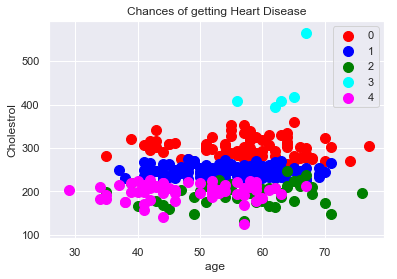

In [431]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,4], s = 100, c = 'red', label = '0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 4], s = 100, c = 'blue', label = '1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 4], s = 100, c = 'green', label = '2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 4], s = 100, c = 'cyan', label = '3')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 4], s = 100, c = 'magenta', label = '4')
plt.title('Chances of getting Heart Disease')
plt.xlabel('age ') # 연령
plt.ylabel('Cholestrol') # 콜레스테롤 수치
plt.legend()
plt.show()

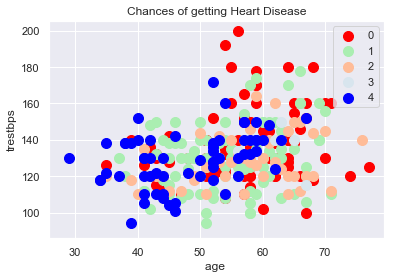

In [432]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,3], s = 100, c = 'red', label = '0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 3], s = 100, c = '#aaeeb1', label = '1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 3], s = 100, c = '#ffbc98', label = '2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 3], s = 100, c = '#d8e5ee', label = '3')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 3], s = 100, c = 'blue', label = '4')
plt.title('Chances of getting Heart Disease')
plt.xlabel('age ') # 연령
plt.ylabel('trestbps') # 혈압
plt.legend()
plt.show()
# 빨간색 그룹이 파란색 그룹보다 심장질환을 가질 확률이 높다.

In [434]:
#############################################################################

In [436]:
#nlltk (자연어처리 툴킷)  konlpy (한글처리) 사용한 wordcloud

In [435]:
#############################################################################